# **MiCRM walkthrough**

In [76]:
# Load packages
using MiCRM

### **Starting with parameter settings**

In [170]:
N = 5
M = 5
leakage = 0.1

0.1

In [248]:
mm = [0.896, 0.725, 0.558, 0.923, 0.194]

5-element Vector{Float64}:
 0.896
 0.725
 0.558
 0.923
 0.194

In [249]:
p = MiCRM.Parameters.generate_params(N, M, f_m = mm, λ = leakage)

LoadError: MethodError: objects of type Vector{Float64} are not callable
Use square brackets [] for indexing an Array.

In [233]:
fieldnames(typeof(p))

(:N, :M, :u, :m, :ρ, :ω, :l, :kw)

In [250]:
p.m

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [204]:
0.29+0.03+0.31+0.13+0.22

0.9799999999999999

In [173]:
p[3]

5×5 Matrix{Float64}:
 0.298792  0.0284902  0.315052   0.137601  0.220065
 0.40063   0.132693   0.0845129  0.335559  0.0466056
 0.309887  0.243903   0.0292764  0.409719  0.00721444
 0.511548  0.0450367  0.0174316  0.309606  0.116377
 0.156824  0.0699126  0.269219   0.486051  0.0179936

In [174]:
using DifferentialEquations

In [187]:
x0 = ones(N+M)
tspan = (0,50)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 50)
u0: 10-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [241]:
test = [0.99, 0.12]

2-element Vector{Float64}:
 0.99
 0.12

In [242]:
typeof(test)

Vector{Float64} (alias for Array{Float64, 1})

In [188]:
x0

10-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [189]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 29-element Vector{Float64}:
  0.0
  0.08671461966872197
  0.2339766168610254
  0.40956738103443435
  0.6350994872950049
  0.9060309966745361
  1.240739142509665
  1.647648736982947
  2.146585647156587
  2.7441166734794873
  3.452567920376143
  4.285891370854883
  5.267466904090451
  ⋮
 13.968017378038425
 16.9486158806264
 20.46132297304814
 24.39281092728274
 28.456226359609843
 32.36123247501201
 36.02151559888195
 39.501810161683764
 42.90615207967955
 46.31478549797452
 49.76594696893349
 50.0
u: 29-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [0.9883775544112817, 0.9874231714582062, 0.9874870587817061, 0.987198387360166, 0.9876240969913455, 0.8810350981433833, 0.9633622248027066, 0.9511119025280139, 0.8794183264664615, 0.9716558520745453]
 [0.9578211513420612, 0.9520574118748438, 0.9524529362239124, 0.9507139049122553, 0.9532416530396075, 0.7341408690431899, 0.911

In [190]:
sol.u

29-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [0.9883775544112817, 0.9874231714582062, 0.9874870587817061, 0.987198387360166, 0.9876240969913455, 0.8810350981433833, 0.9633622248027066, 0.9511119025280139, 0.8794183264664615, 0.9716558520745453]
 [0.9578211513420612, 0.9520574118748438, 0.9524529362239124, 0.9507139049122553, 0.9532416530396075, 0.7341408690431899, 0.911859337411089, 0.8828876137134961, 0.7308978356557695, 0.9308288934378726]
 [0.9100813266810115, 0.896020884304757, 0.8970105342557332, 0.8927880464861406, 0.8988264703431403, 0.6238250003326206, 0.865781420319766, 0.8224859749605512, 0.6197588972081679, 0.893108556674248]
 [0.8406007110711262, 0.8153218036043477, 0.8171496235999067, 0.8096119699075436, 0.8201873957345496, 0.5470705568125255, 0.8261339241886237, 0.7711717695824657, 0.5428019123337525, 0.8593642260554316]
 [0.7557464298027494, 0.7190000596627037, 0.7217258858170875, 0.71086348710788, 0.7258014411961893, 0.5093582

In [191]:
size(sol)

(10, 29)

In [192]:
size(sol.t)

(29,)

In [193]:
using Plots

In [194]:
C = reduce(hcat, sol.u)'[:, 1:N]

29×5 Matrix{Float64}:
 1.0          1.0          1.0          1.0          1.0
 0.988378     0.987423     0.987487     0.987198     0.987624
 0.957821     0.952057     0.952453     0.950714     0.953242
 0.910081     0.896021     0.897011     0.892788     0.898826
 0.840601     0.815322     0.81715      0.809612     0.820187
 0.755746     0.719        0.721726     0.710863     0.725801
 0.658474     0.611792     0.615338     0.601673     0.620085
 0.557123     0.503713     0.507856     0.492378     0.512835
 0.457883     0.401493     0.405942     0.389764     0.410786
 0.368509     0.312664     0.317129     0.301257     0.3216
 0.292351     0.239687     0.243938     0.229101     0.24792
 0.229926     0.182087     0.185977     0.172608     0.189434
 0.179623     0.13747      0.140917     0.129226     0.143856
 ⋮                                                   
 0.0425551    0.0282695    0.029463     0.0256116    0.0303468
 0.0293132    0.0191028    0.0199588    0.017216     0.0205796


In [195]:
size(C)

(29, 5)

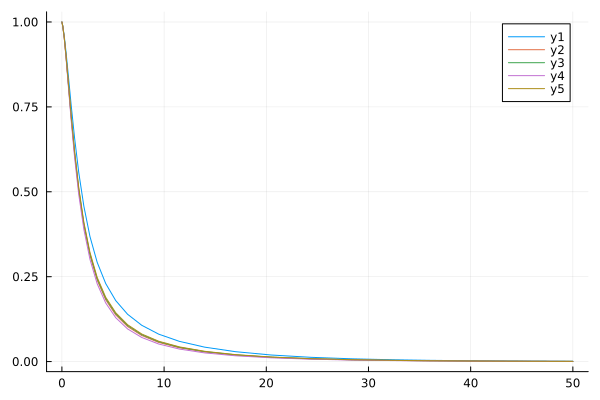

In [196]:
plot(sol.t, C)

In [197]:
R = reduce(hcat, sol.u)'[:, N+1:N+M]

29×5 Matrix{Float64}:
 1.0       1.0       1.0       1.0       1.0
 0.881035  0.963362  0.951112  0.879418  0.971656
 0.734141  0.911859  0.882888  0.730898  0.930829
 0.623825  0.865781  0.822486  0.619759  0.893109
 0.547071  0.826134  0.771172  0.542802  0.859364
 0.509358  0.799729  0.737474  0.505314  0.835612
 0.503858  0.788041  0.722719  0.500242  0.82363
 0.524162  0.791708  0.727122  0.521033  0.824581
 0.563633  0.808783  0.747879  0.561003  0.83725
 0.614965  0.834868  0.779567  0.612835  0.858138
 0.671704  0.864726  0.816065  0.670077  0.882762
 0.728414  0.89382   0.852152  0.727279  0.907125
 0.781355  0.91937   0.884585  0.780669  0.928731
 ⋮                                       
 0.948967  0.984748  0.97524   0.949223  0.985588
 0.965214  0.989781  0.98316   0.965441  0.990237
 0.977139  0.993348  0.98892   0.977315  0.99359
 0.985382  0.995718  0.992841  0.985505  0.995851
 0.990775  0.997127  0.995262  0.990848  0.997217
 0.994242  0.99787   0.996632  0.994271  0.9

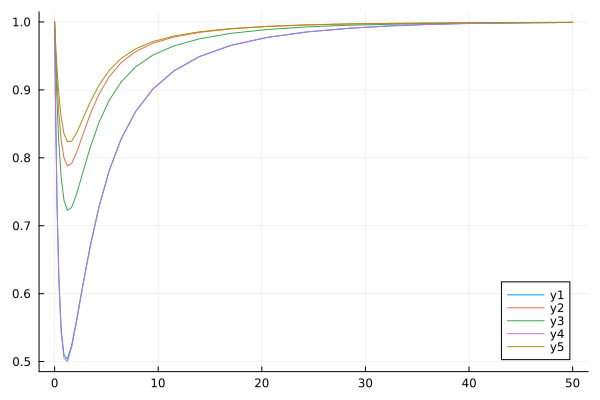

In [198]:
plot(sol.t, R)